In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

05/19/2019 21:17:07 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
05/19/2019 21:17:24 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
05/19/2019 21:17:41 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
05/19/2019 21:17:57 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-11_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

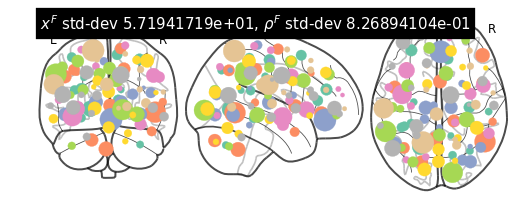

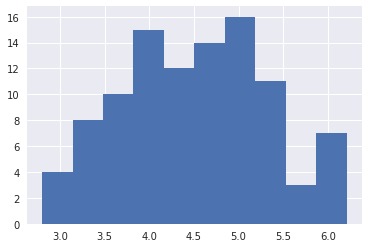

(<nilearn.plotting.displays.OrthoProjector at 0x7f9610481668>,
 tensor([[-3.8405e+01, -4.0783e+01,  5.5090e+01],
         [ 5.3167e+01, -2.4131e+01,  3.5562e+01],
         [-2.8439e+01, -3.6547e+01, -8.7214e+00],
         [-2.8161e+01,  4.0316e+01,  2.1708e+01],
         [ 1.5208e+01, -7.0014e+01,  4.2001e+01],
         [ 1.0443e+01,  3.1166e+01,  1.0097e+01],
         [ 3.3468e+01, -6.5546e+01, -3.6812e+01],
         [ 3.2861e+01, -1.9617e+01,  5.2879e+01],
         [-1.8909e+01, -6.1200e+01,  8.7785e-01],
         [ 1.3457e+01, -4.9451e+01,  2.0701e+01],
         [-3.5474e+01, -3.9523e+01,  2.0576e+01],
         [-2.5617e+01, -1.4114e+01,  3.3839e+01],
         [ 9.2454e+00,  1.3795e+01,  5.7736e+01],
         [ 1.9538e+00,  7.4977e+00,  4.2400e+00],
         [ 4.6702e+01,  3.5087e+01, -3.6777e+00],
         [-3.6032e+01, -6.2320e+01,  4.1866e+01],
         [ 4.5665e+01,  6.9036e+00, -2.2909e+01],
         [ 1.2975e+01, -1.0628e+01,  6.4146e+01],
         [-3.3203e+01,  2.4418e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

In [9]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100)

05/19/2019 21:34:14 [Epoch 1] (24743ms) Posterior free-energy 2.21358874e+09 = KL from prior 1.71313888e+06 - log-likelihood -2.21187533e+09
05/19/2019 21:34:14 Saving checkpoint...
05/19/2019 21:34:38 [Epoch 2] (23559ms) Posterior free-energy 2.11948083e+09 = KL from prior 1.52304750e+06 - log-likelihood -2.11795789e+09
05/19/2019 21:35:00 [Epoch 3] (22108ms) Posterior free-energy 2.05220646e+09 = KL from prior 1.37155238e+06 - log-likelihood -2.05083469e+09
05/19/2019 21:35:22 [Epoch 4] (22236ms) Posterior free-energy 2.00829414e+09 = KL from prior 1.25509200e+06 - log-likelihood -2.00703885e+09
05/19/2019 21:35:44 [Epoch 5] (22327ms) Posterior free-energy 1.97656218e+09 = KL from prior 1.16195562e+06 - log-likelihood -1.97539968e+09
05/19/2019 21:36:07 [Epoch 6] (22245ms) Posterior free-energy 1.95341606e+09 = KL from prior 1.08218362e+06 - log-likelihood -1.95233331e+09
05/19/2019 21:36:29 [Epoch 7] (22184ms) Posterior free-energy 1.93657126e+09 = KL from prior 1.01049638e+06 - log

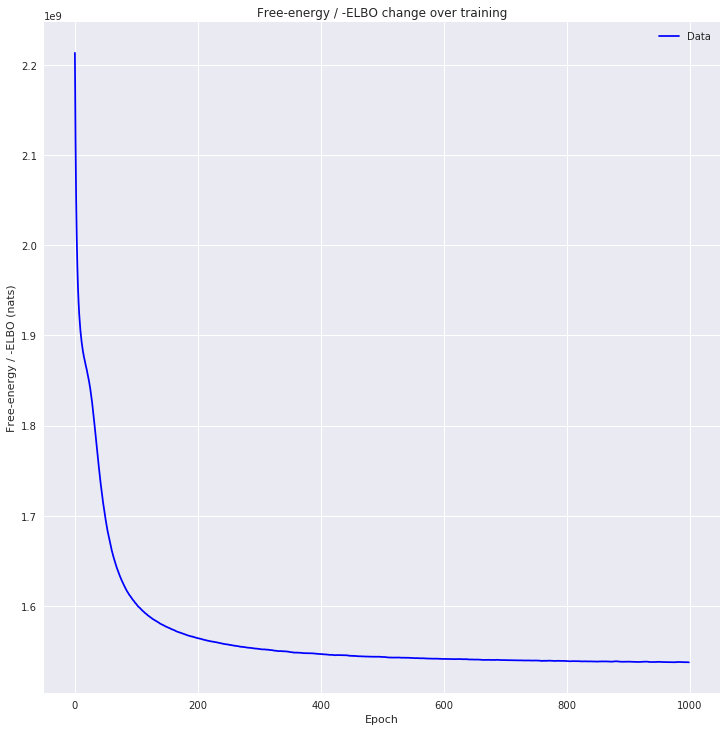

In [10]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


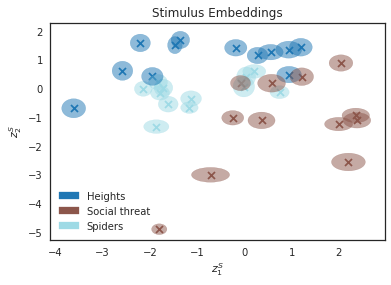

In [11]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None)

In [12]:
def subject_labeler(block):
    return 'Subject %d' % block.subject

def subject_run_labeler(block):
    return 'sub%drun%d' % (block.subject, block.run)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


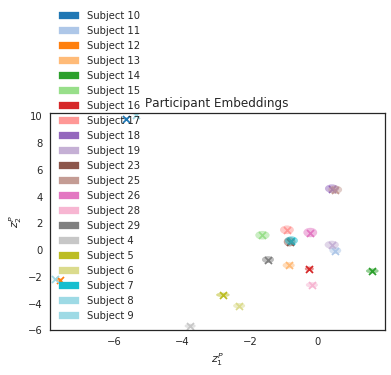

In [13]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


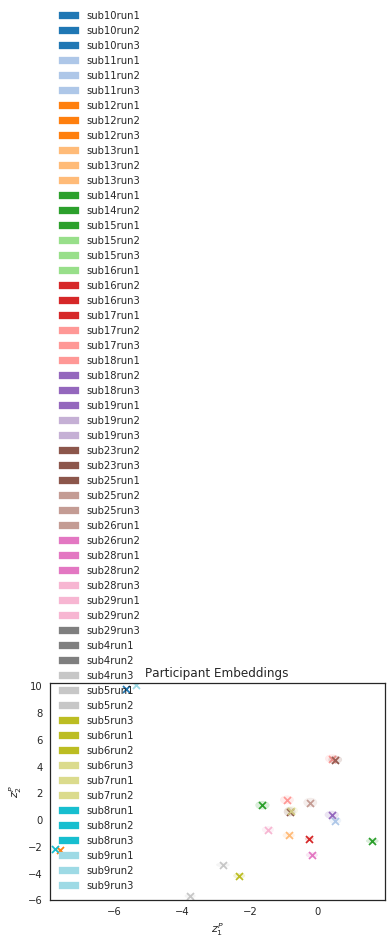

In [14]:
dtfa.scatter_subject_embedding(labeler=subject_run_labeler, figsize=None)

05/20/2019 03:45:17 Plotting factors for Participant 11, run 3


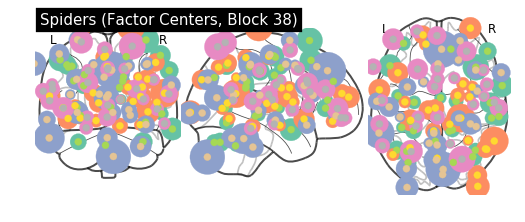

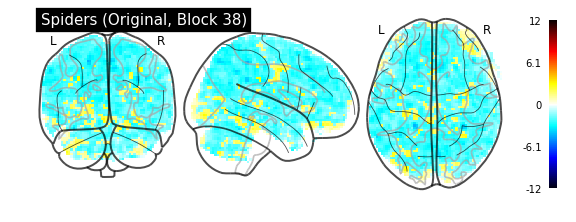

05/20/2019 03:45:21 Reconstruction Error (Frobenius Norm): 1.05241968e+03 out of 1.25744629e+03


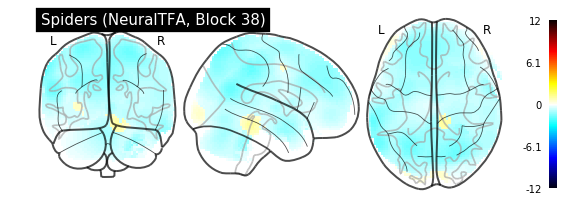

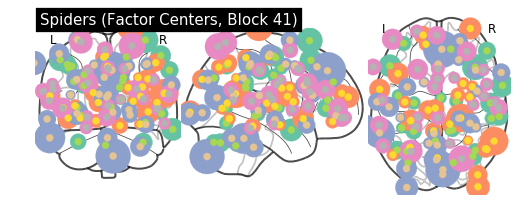

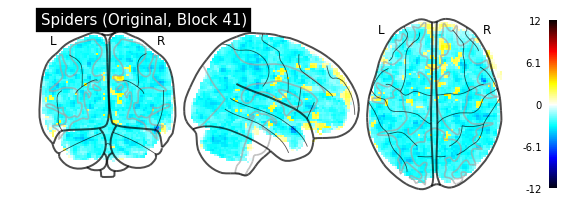

05/20/2019 03:45:26 Reconstruction Error (Frobenius Norm): 1.32535217e+03 out of 1.58387207e+03


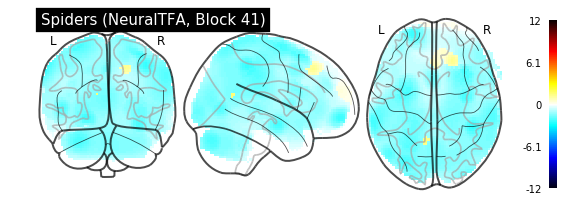

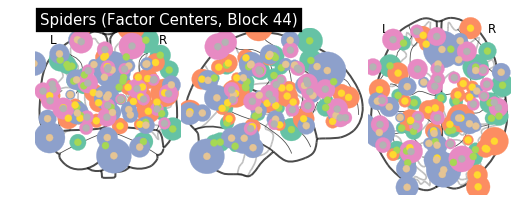

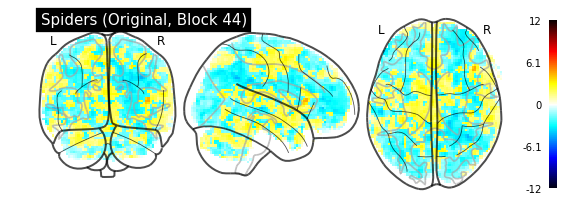

05/20/2019 03:45:31 Reconstruction Error (Frobenius Norm): 1.09209668e+03 out of 1.23264612e+03


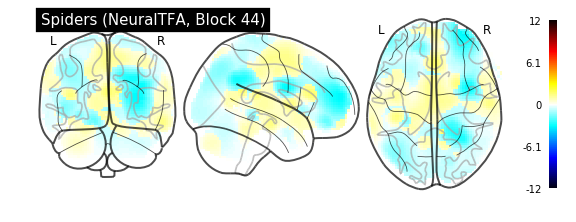

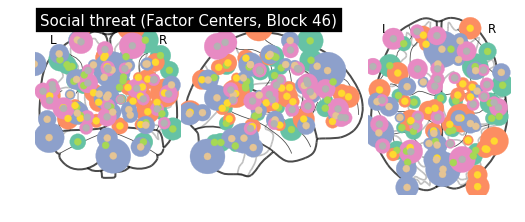

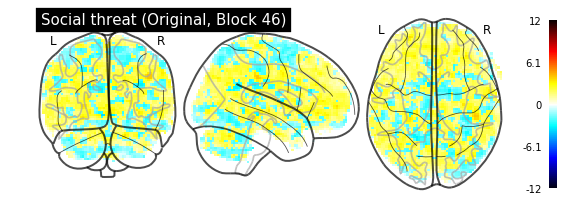

05/20/2019 03:45:36 Reconstruction Error (Frobenius Norm): 1.23653601e+03 out of 1.48868665e+03


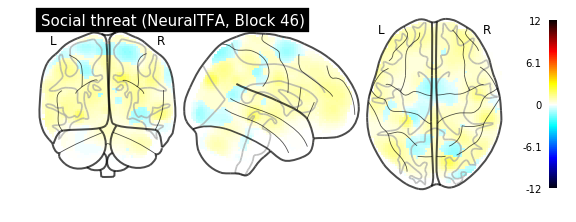

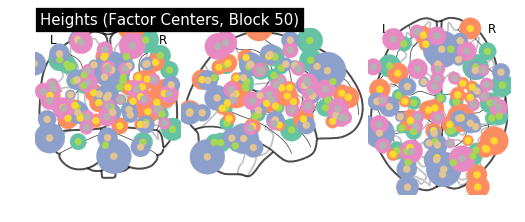

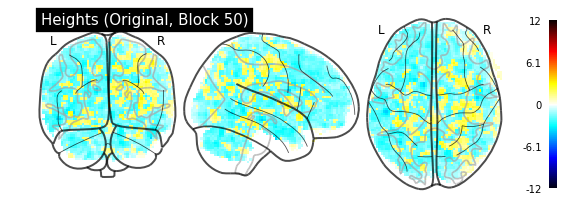

05/20/2019 03:45:40 Reconstruction Error (Frobenius Norm): 1.02445374e+03 out of 1.18422876e+03


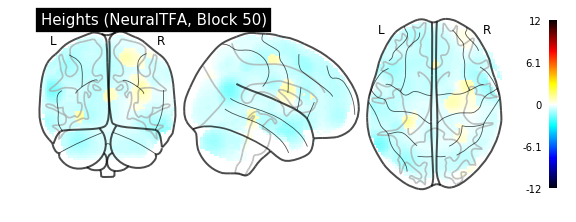

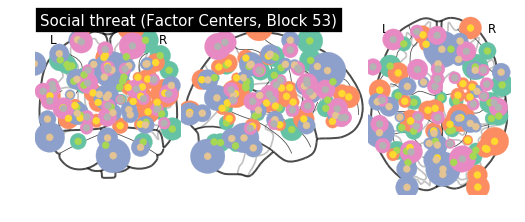

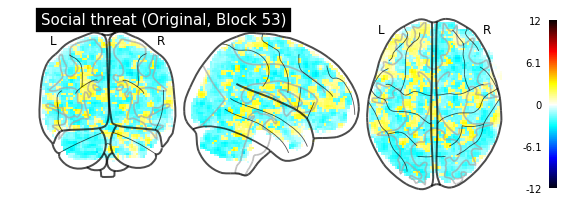

05/20/2019 03:45:45 Reconstruction Error (Frobenius Norm): 1.17677917e+03 out of 1.34052478e+03


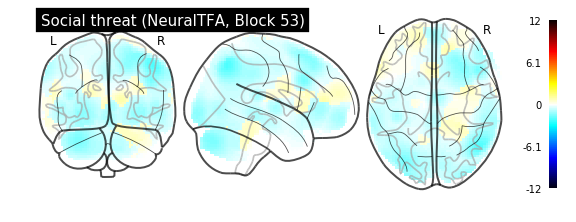

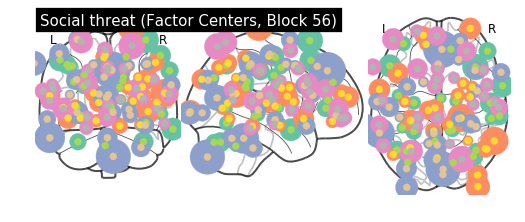

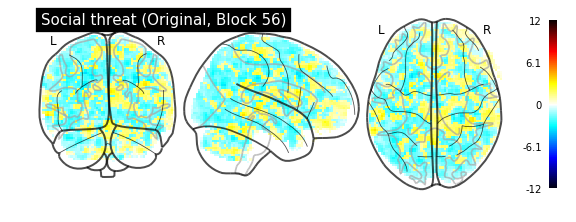

05/20/2019 03:45:50 Reconstruction Error (Frobenius Norm): 1.01186530e+03 out of 1.14132068e+03


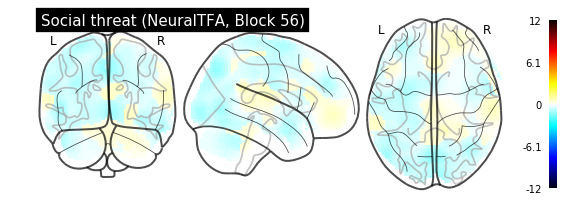

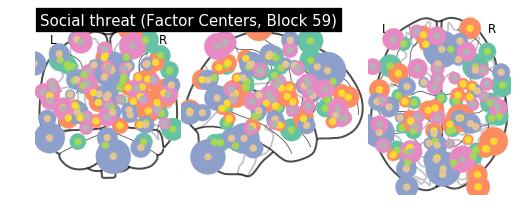

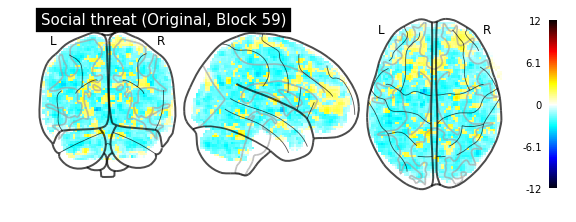

05/20/2019 03:45:55 Reconstruction Error (Frobenius Norm): 1.00635870e+03 out of 1.13990613e+03


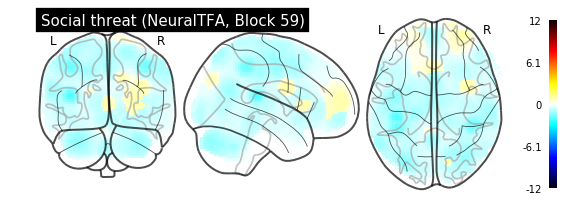

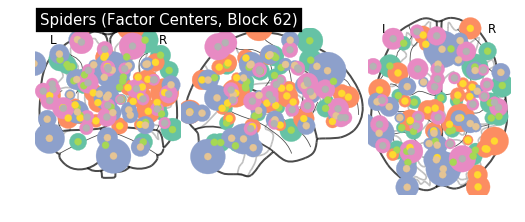

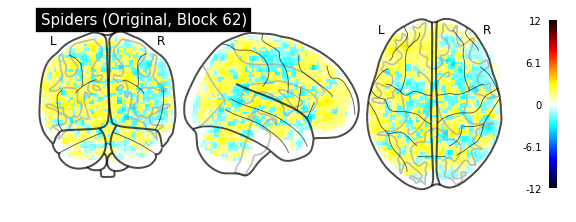

05/20/2019 03:46:00 Reconstruction Error (Frobenius Norm): 1.00594739e+03 out of 1.13954065e+03


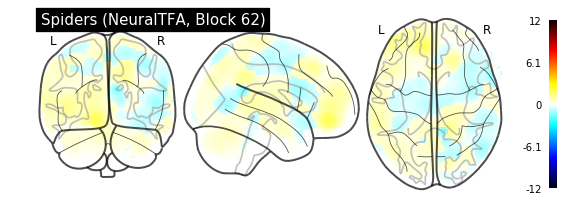

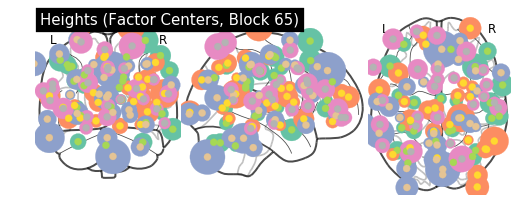

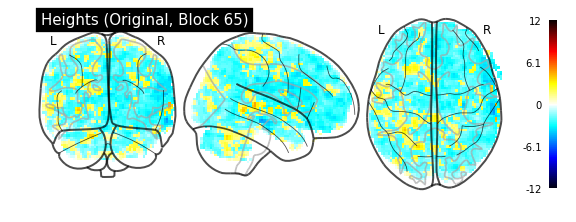

05/20/2019 03:46:04 Reconstruction Error (Frobenius Norm): 1.09913037e+03 out of 1.35510022e+03


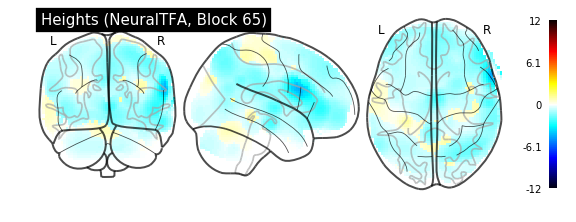

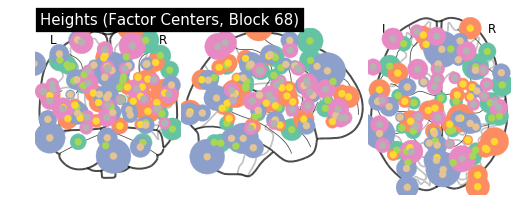

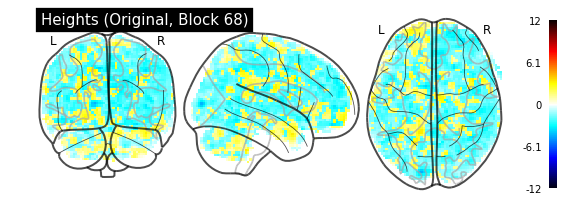

05/20/2019 03:46:09 Reconstruction Error (Frobenius Norm): 1.35302454e+03 out of 1.59393250e+03


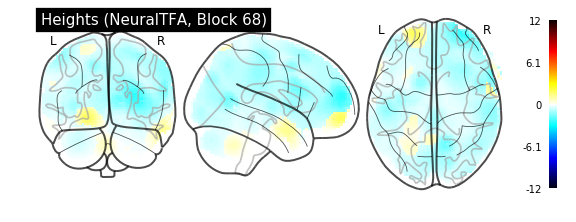

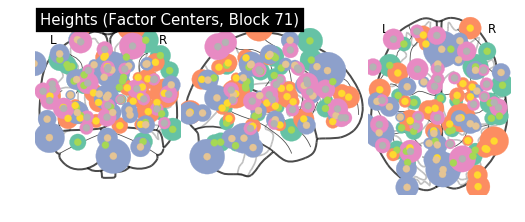

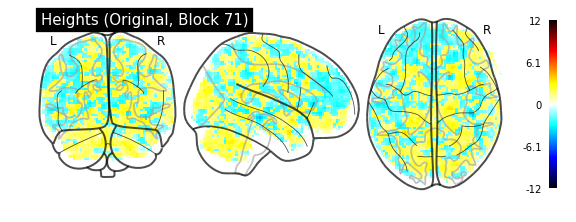

05/20/2019 03:46:14 Reconstruction Error (Frobenius Norm): 1.09730359e+03 out of 1.24387024e+03


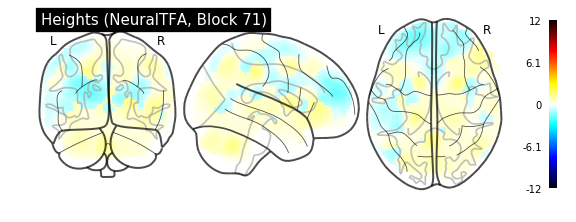

In [15]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=task_labeler)
        dtfa.plot_original_brain(index, labeler=task_labeler)
        dtfa.plot_reconstruction(index, labeler=task_labeler)


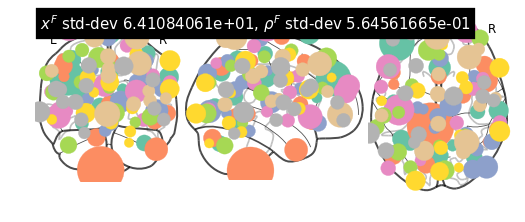

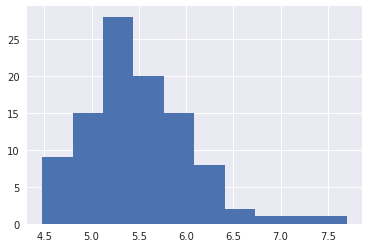

(<nilearn.plotting.displays.OrthoProjector at 0x7f936bc79f60>,
 tensor([[-3.8436e+01, -5.3152e+01,  5.2802e+01],
         [ 6.3717e+01, -2.3091e+01,  3.4247e+01],
         [-2.7791e+01, -5.6754e+01, -1.4744e+01],
         [-4.3312e+01,  4.7700e+01,  3.3255e+01],
         [ 1.4148e+00, -7.0385e+01,  3.9735e+01],
         [ 1.8490e+00,  3.0140e+01,  1.3103e+01],
         [ 3.7902e+01, -7.2143e+01, -3.5187e+01],
         [ 4.1530e+01, -2.4073e+01,  5.9505e+01],
         [-8.7786e+00, -7.7065e+01,  3.2114e+00],
         [ 1.5259e+01, -5.9890e+01,  2.1194e+01],
         [-2.9439e+01, -5.6325e+01,  1.3874e+01],
         [-4.6886e+01, -1.3630e+01,  3.4966e+01],
         [ 1.6545e+00,  2.2100e+01,  8.0897e+01],
         [ 6.3317e-01,  1.2817e+01,  6.1885e+00],
         [ 4.8856e+01,  2.5165e+01, -1.1542e+01],
         [-4.7372e+01, -7.0365e+01,  4.5923e+01],
         [ 5.0455e+01,  8.4134e+00, -4.1733e+01],
         [ 2.5954e+01, -6.7617e+00,  7.7594e+01],
         [-4.7170e+01,  1.6935e+01,  

In [16]:
dtfa.visualize_factor_embedding()

In [17]:
dtfa.average_reconstruction_error()

05/20/2019 03:46:56 Average reconstruction error (MSE): 8.35178441e-01
05/20/2019 03:46:56 Average data norm (Euclidean): 1.00953693e+00
05/20/2019 03:46:56 Percent average reconstruction error: 0.296055


(0.8351784406417632, 1.0095369290342087, 0.002960546844456153)

In [18]:
dtfa.average_reconstruction_error(weighted=False)

05/20/2019 03:47:34 Average reconstruction error (MSE): 1.07112268e+03 +/- 9.32625281e+01
05/20/2019 03:47:34 Average data norm (Euclidean): 1.28980564e+03 +/- 1.57811242e+02
05/20/2019 03:47:34 Percent average reconstruction error: 83.495089 +/- 5.72959559e+00


(array([1229.01977539, 1117.68029785, 1207.27758789, 1200.71899414,
        1136.25976562, 1156.65319824, 1089.86254883, 1126.76574707,
        1165.97729492, 1107.27514648, 1180.56530762, 1160.45605469,
        1114.88793945, 1135.22521973, 1135.69042969, 1083.90039062,
        1105.7277832 , 1108.62768555, 1126.53967285, 1127.48779297,
        1101.00866699, 1147.35876465, 1148.80090332, 1134.62084961,
        1126.34753418, 1173.98242188, 1127.89379883, 1163.81323242,
        1198.52233887, 1154.29724121, 1154.76538086, 1162.68261719,
        1127.59240723, 1205.47277832, 1150.69604492, 1210.0579834 ,
        1030.74829102, 1107.43310547, 1052.00256348, 1072.2767334 ,
        1104.80822754, 1324.75634766, 1016.95812988, 1115.79443359,
        1092.35522461, 1149.6171875 , 1238.16906738, 1006.27087402,
        1008.10534668,  977.67108154, 1024.20629883, 1068.61877441,
        1003.85614014, 1176.60974121, 1030.49487305,  980.88360596,
        1011.22637939, 1048.97131348,  996.39855

In [19]:
def subject_fear_labeler(block, task_labeler=task_labeler, threshold=0.5):
    subject = block.subject
    task = task_labeler(block)
    if block.individual_differences['fear_rating']:
        subject_others = [b.individual_differences['fear_rating'] for b in dtfa._blocks if task_labeler(b) == task and subject == b.subject]
        if np.mean(subject_others) >= threshold:
            return 'Afraid of ' + task
        return 'Unafraid of ' + task
    return None

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


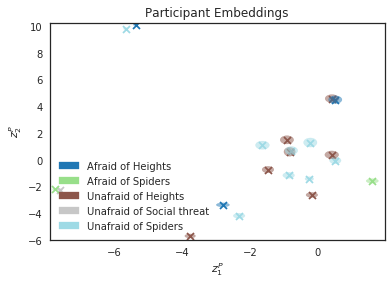

In [20]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None)